In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from estimate_direct_demand import get_state_median_income

In [5]:
POVERTY_CSV = 'poverty_levels.csv'
OEC_SMI = 'oec_smi_data.csv'

In [10]:
# Load initial data
poverty_df = pd.read_csv(POVERTY_CSV, index_col='household_size')
smi_df = get_state_median_income()
OEC_2019_data = pd.read_csv(OEC_SMI, index_col='household_size')

smi_df.rename(columns=lambda x: f"{x}_census_smi", inplace=True)
poverty_df.rename(columns=lambda x: f"{x}_census_poverty", inplace=True)
OEC_2019_data.rename(columns=lambda x: f"{x}_oec_2019", inplace=True)
smi_poverty_df = smi_df.join(poverty_df, how='outer')
joined_df = smi_poverty_df.join(OEC_2019_data, how='outer')

In [26]:
joined_df['smi_75_percent'] = joined_df['ct_smi_census_smi'] * .75
joined_df['estimated_poverty'] = joined_df[['one_adult_census_poverty', 'two_adults_census_poverty']].mean(axis=1)
joined_df['poverty_2x'] = joined_df['estimated_poverty'] * 2
joined_df['census_ratio'] = joined_df['smi_75_percent'] / joined_df['estimated_poverty']
joined_df['x100FPL_oec_2019'] = joined_df['x200FPL_oec_2019'] / 2
joined_df['oec_ratio'] = joined_df['x75SMI_oec_2019'] / joined_df['x100FPL_oec_2019']

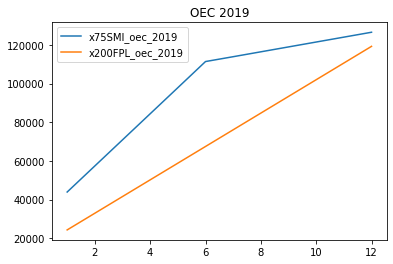

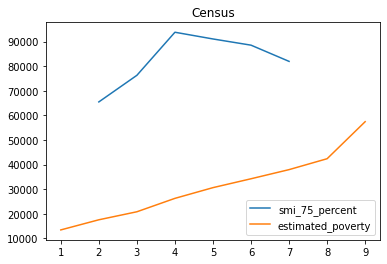

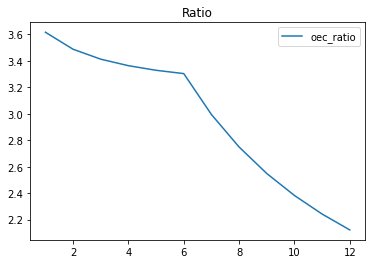

In [27]:
ax = plt.gca()
# joined_df.plot(kind='line',y='smi_75_percent',ax=ax)
# joined_df.plot(kind='line',y='estimated_poverty',ax=ax)
# joined_df.plot(kind='line',y='poverty_2x',ax=ax)
joined_df.plot(kind='line',y='x75SMI_oec_2019',ax=ax)
joined_df.plot(kind='line',y='x200FPL_oec_2019',ax=ax)
plt.title('OEC 2019')
plt.show()

ax = plt.gca()
joined_df.plot(kind='line',y='smi_75_percent',ax=ax)
joined_df.plot(kind='line',y='estimated_poverty',ax=ax)
plt.title('Census')
plt.show()

ax = plt.gca()
# joined_df.plot(kind='line',y='census_ratio',ax=ax)
joined_df.plot(kind='line',y='oec_ratio',ax=ax)
plt.title('Ratio')
plt.show()

In [ ]:
poverty_df.index

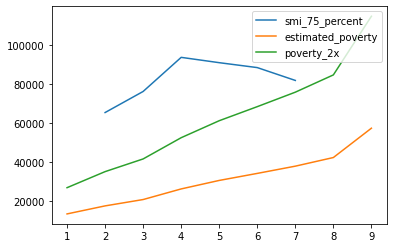

In [24]:
poverty_df.index

In [6]:
poverty_df.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='household_size')